# 02-Análisis Exploratorio y Generación de Hipótesis

En este notebook exploraremos la data obtenida del análisis de churn en el notebook anterior. Posteriormente, se analizará el comportamiento de las variables obtenidas y se procederá a formular algunas hipótesis relacionadas con el comportamiento de la variable de interés.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from utils import *
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [5]:
##leer data churn y fuentes exploradas anteriormente
churn_data=pd.read_csv("churn_data.csv",sep=";",dtype={'Asegurado__c':str,'NumeroPoliza__c':str,'CodigoTipoAsegurado__c':str,'churn':int,'ClaseVehiculo__c':str,'TipoVehiculo__c':str,'PuntoVenta__c':str,'MarcaVehiculo__c':str},na_values="nan")

### Características Generales de la información

In [6]:
print("Total Registros para Churn ",churn_data.shape[0])
print("Total Columnas para Churn ",churn_data.shape[1])


Total Registros para Churn  8440
Total Columnas para Churn  26


In [7]:
## Extraer total de nulos por cada campo
churn_data.isnull().sum()

Asegurado__c                     0
CodigoTipoAsegurado__c           0
PuntoVenta__c                    0
tipo_ramo_name                   0
tipo_prod_desc                   0
ClaseVehiculo__c                 0
MarcaVehiculo__c              8440
MdeloVehiculo__c              8440
TipoVehiculo__c                  0
NumeroPoliza__c                  0
FechaInicioVigencia__ctrim       0
churn                            0
n_prod_prev                   6743
total_siniestros              6581
total_pagado_smmlv            6581
anios_ultimo_siniestro        6581
Activos__c                    4282
AnnualRevenue                 4282
MontoAnual__c                 8433
OtrosIngresos__c              5105
Profesion__pc                 8440
EgresosAnuales__c             4282
EstadoCivil__pc               4141
Genero__pc                    4141
ciudad_name                   4141
edad                          4142
dtype: int64

### Exploración univariada de las variables

Desde esta vista podemos ver que las variables MdeloVehiculo__c, TipoVehiculo__c y MarcaVehiculo__c no tienen valores que permitan diferenciar algún comportamiento de la variable de interés, por tanto no serán incluidas.

In [8]:
##Estadísticas generales 
churn_data.describe()

,MdeloVehiculo__c,churn,n_prod_prev,total_siniestros,total_pagado_smmlv,anios_ultimo_siniestro,Activos__c,AnnualRevenue,MontoAnual__c,OtrosIngresos__c,Profesion__pc,EgresosAnuales__c,edad
count,0.0,8440.000000,1697.000000,1859.000000,1859.000000,1859.000000,4.158000e+03,4.158000e+03,7.000000,3.335000e+03,0.0,4.158000e+03,4298.000000
mean,NaN,0.527607,3.548026,89.056482,1478.300089,0.162795,4.296783e+08,3.200649e+08,457.428571,2.825766e+06,NaN,2.719224e+08,46.444732
std,NaN,0.499267,2.791954,65.119279,1020.381999,0.702566,1.757767e+09,2.047398e+09,1122.179257,6.280392e+07,NaN,1.982687e+09,14.214021
min,NaN,0.000000,1.000000,1.000000,0.000000,0.002740,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,NaN,0.000000e+00,1.578082
25%,NaN,0.000000,2.000000,38.000000,816.720172,0.002740,4.600000e+07,2.400000e+07,0.000000,0.000000e+00,NaN,1.268025e+07,35.354110
50%,NaN,1.000000,2.000000,150.000000,2414.537144,0.002740,1.200000e+08,4.573600e+07,0.000000,0.000000e+00,NaN,2.625500e+07,45.002740
75%,NaN,1.000000,8.000000,150.000000,2414.537144,0.008219,3.200000e+08,9.800000e+07,101.000000,0.000000e+00,NaN,6.000000e+07,56.354110
max,NaN,1.000000,8.000000,150.000000,2414.537144,8.758904,5.643562e+10,4.241736e+10,3000.000000,3.479488e+09,NaN,4.033891e+10,122.504110


In [9]:
for col in churn_data.drop(columns=["Asegurado__c","PuntoVenta__c","anios_ultimo_siniestro","total_pagado_smmlv","NumeroPoliza__c","FechaInicioVigencia__ctrim"]).columns:
    if churn_data[col].dtype=="O":
        print(churn_data.groupby(col).agg({'churn':'count'}))

                        churn
CodigoTipoAsegurado__c       
1                        8040
2                          51
3                          58
4                         291
                       churn
tipo_ramo_name              
automoviles             4754
responsabilidad civil   3686
                       churn
tipo_prod_desc              
automoviles             4596
extracontractual        2602
operadores portuarios    362
otras                    183
profesionales medicos    697
                  churn
ClaseVehiculo__c       
99999              8440
Empty DataFrame
Columns: [churn]
Index: []
                 churn
TipoVehiculo__c       
99999             8440
                 churn
EstadoCivil__pc       
CASADO            1203
DIVORCIADO           7
N A                  1
OTRO               689
SEPARADO             9
SOLTERO           2329
UNIDO               49
VIUDO               12
            churn
Genero__pc       
FEMENINO     1176
MASCULINO    3122
N A            

## Reporte General

Mediante Pandas Profiling podemos obtener una vista general de los datos, este reporte se exporta en archivos .html o insertado dentro del notebook.

In [10]:
from pandas_profiling import ProfileReport

##para visualizar abrir reporte_churn.html en navegador
reporte=ProfileReport(churn_data.drop(columns=['Asegurado__c']),title="Reporte Data Churn",explorative=True)
reporte.to_file("reporte_churn.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 71.43it/s]


- De este análisis univariado podemos concluir que existen variables con elevado número de faltantes MdeloVehiculo__c y MarcaVehiculo__c  (21.7%). Sin embargo es de esperarse este comportamiento ya que son variables que se generan a partir del registro de siniestros del cliente. A su vez, solo se está analizando información disponible para el MVP.

- Existen variables con alta correlación las cuales deberán ser utilizadas cuidadosamente en pasos posteriores.

## Interacciones con variable Objetivo

En esta sección analizamos el comportamiento de la variable objetivo en función de las variables predictoras 

In [54]:
#crear lista con nombres de columnas tipo numérico y tipo cadena(string)
num_cols=[i for i in churn_data.columns.values.tolist() if churn_data[i].dtype!="O" and i not in ['churn','Profesion__pc','MdeloVehiculo__c','Asegurado__c','CodigoTipoAsegurado__c','PuntoVenta__c','RamoTecnico__c','Tipo_poliza_c']]
str_cols=[i for i in churn_data.columns.values.tolist() if churn_data[i].dtype not in ["int32","float","int64"] and i not in ['churn','MarcaVehiculo__c','NumeroPoliza__c','TipoVehiculo__c','ClaseVehiculo__c','Producto__c','Asegurado__c','CodigoTipoAsegurado__c','PuntoVenta__c','RamoTecnico__c','Tipo_poliza_c','FechaInicioVigencia__ctrim']]

In [65]:
num_cols

['n_prod_prev',
 'total_siniestros',
 'total_pagado_smmlv',
 'anios_ultimo_siniestro',
 'Activos__c',
 'AnnualRevenue',
 'MontoAnual__c',
 'OtrosIngresos__c',
 'EgresosAnuales__c',
 'edad']

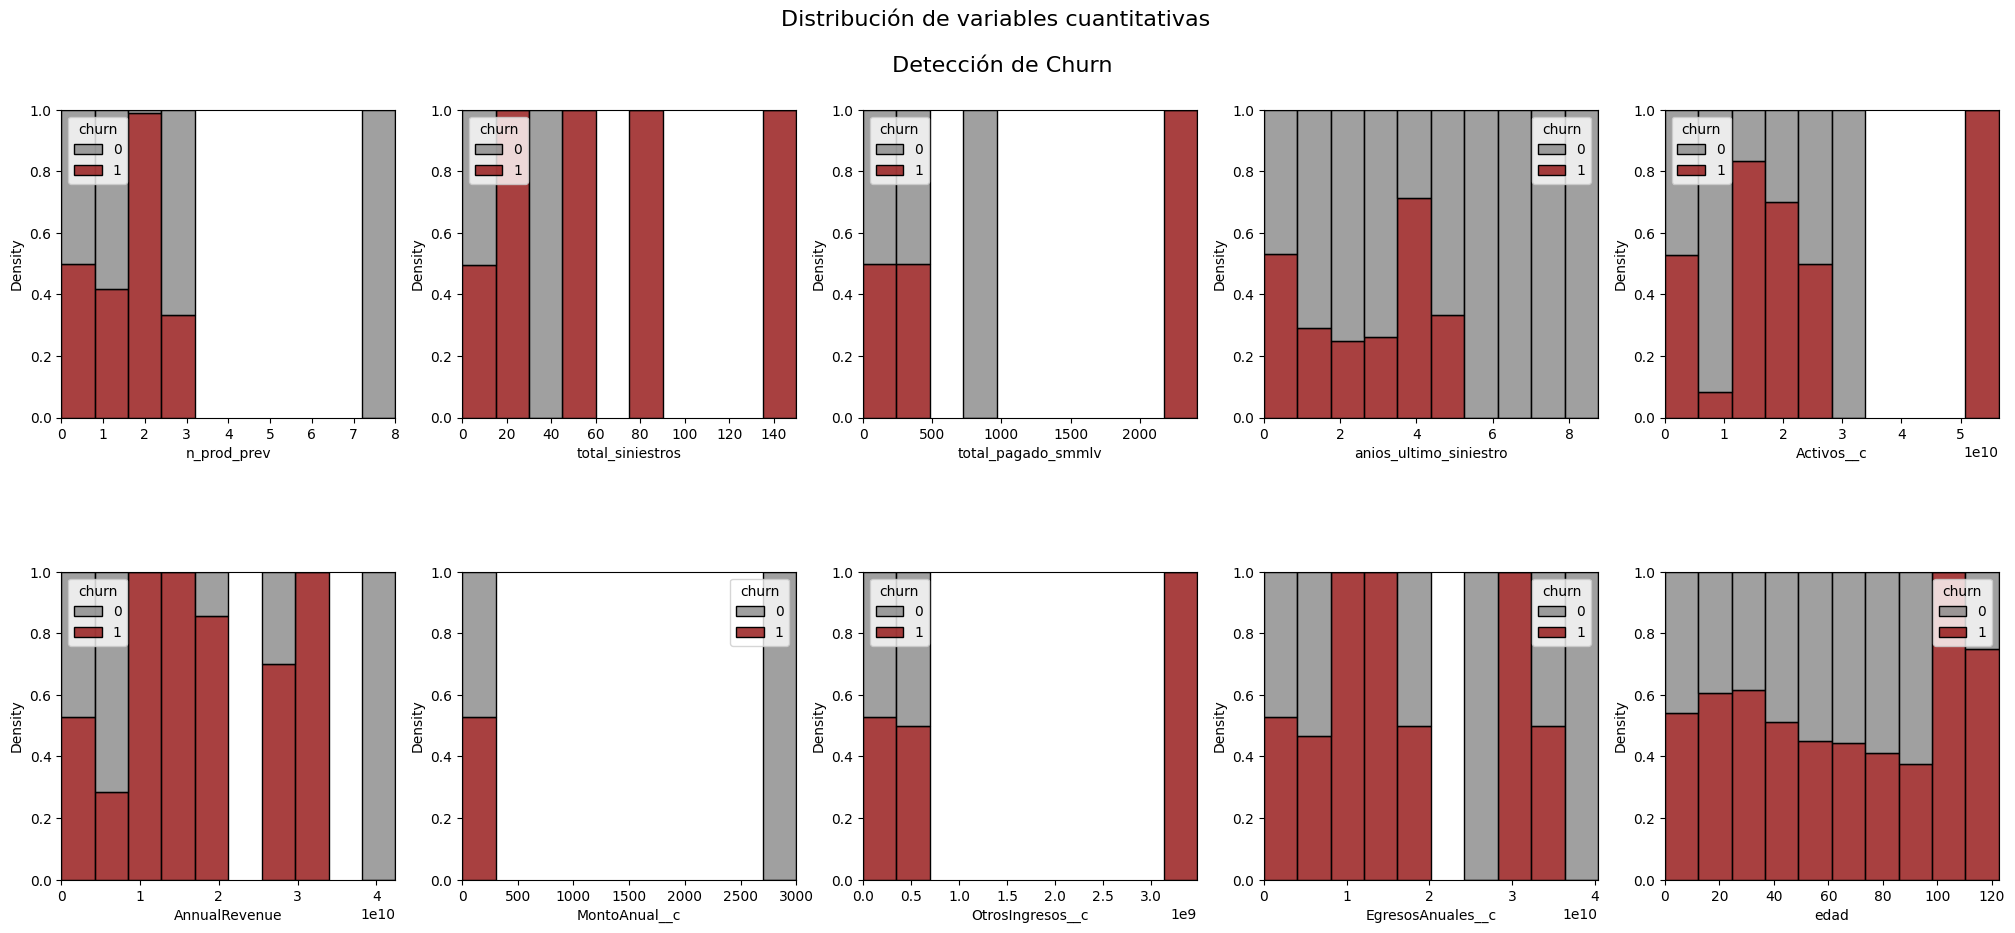

In [68]:
fig = plt.figure(figsize=(25, 10))
for idx,col in enumerate(num_cols):
    aux_data=churn_data[['churn',col]].fillna(0)
    ax=fig.add_subplot(2,5,idx+1)
    plt.subplots_adjust(hspace = 0.5)
    g=sns.histplot(x=col,hue="churn",data=aux_data,ax=ax,multiple="fill",stat="density",bins=10,palette={0:'gray',1:'darkred'})


fig.suptitle("Distribución de variables cuantitativas \n \n Detección de Churn",size=16);

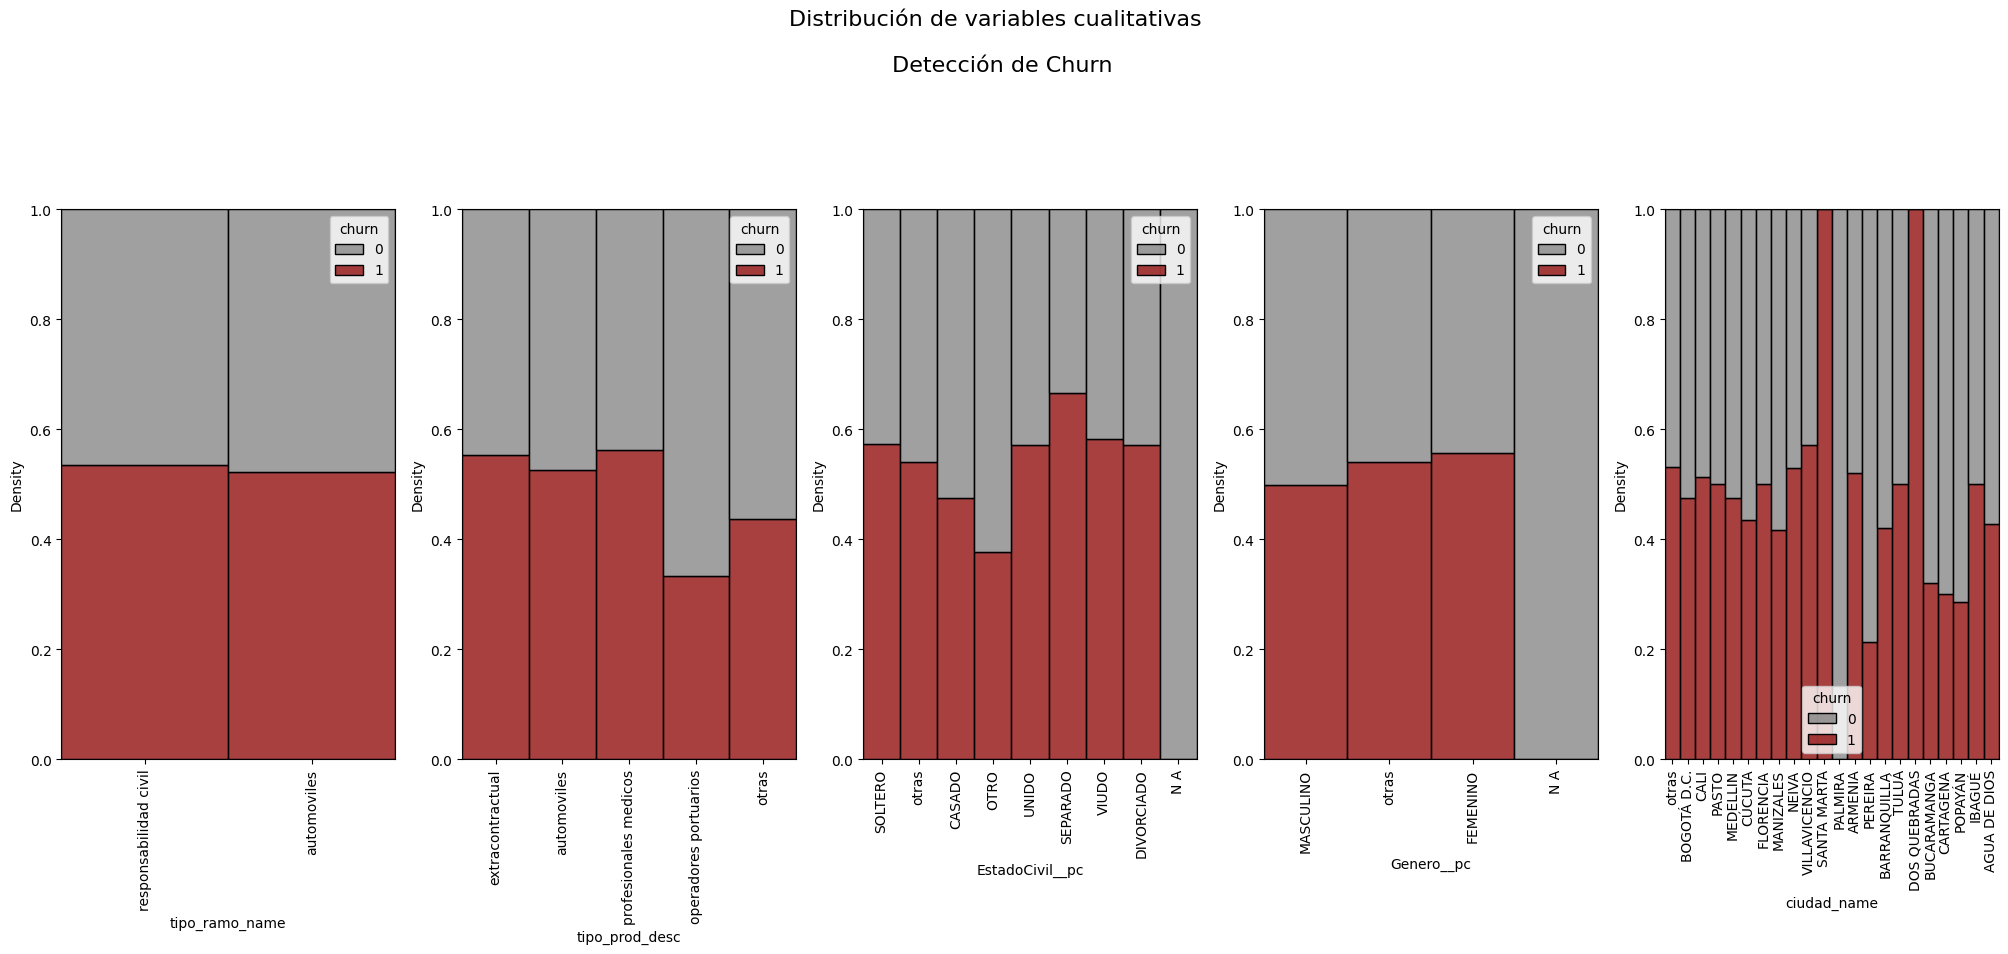

In [76]:
fig = plt.figure(figsize=(25, 20))
fig.tight_layout()
#size_grid=int(len(str_cols)/2)  if len(str_cols)%2==0 else int((len(str_cols)/2)+1)
size_grid=2
for idx,col in enumerate(str_cols):
    aux_data=churn_data[['churn',col]].fillna("otras")
    ax=fig.add_subplot(2,5,idx+1)
    plt.subplots_adjust(hspace = 0.8)
    g=sns.histplot(x=col,hue="churn",data=aux_data,ax=ax,multiple="fill",stat="density",bins=10,palette={0:'gray',1:'darkred'})
    plt.xticks(rotation=90);
    
    del aux_data

fig.suptitle("Distribución de variables cualitativas \n \n Detección de Churn",size=16);

### Discusión y Generación de Hipótesis

- Como se ve en los gráficos anteriores, es notorio que los clientes que abandonan o no renuevan su producto, tienen mayor proporción en los sectores de mayores indicadores económicos (Mayores ingresos,activos). El tipo de producto es también un indicador necesario para estimar la continuidad del cliente. 
- El género y la edad se observan como posibles indicadores del comportamiento del cliente al momento de renovar o no el producto.
- A su vez el comportamiento del cliente con la compañía es también es un posible indicador de fidelización. En campos como el número de productos contratados antes (`n_prod_prev`),el total que se le ha pagado por sinietros en SMMLV (`total_pagado_smmlv`) y años desde el último sinietros (`anios_ultimo_siniestro`), puede observarse un comportamiento diferencial.

Por tanto se generan las hipótesis:

¿Hay evidencia para pensar que el comportamiento de churn es diferente por los siguientes aspectos?
- Género
- Edad
- Tipo de producto
- Productos previos
- tiempo desde el último siniestro
- Beneficios recibidos por la compañía

### Validación de Hipótesis

Debido a la naturaleza de las variables es necesario validar las hipótesis usando diferentes test estadísticos. En este caso, si deseamos comparar variables nominales contra el comportamiento del churn, usaremos la prueba Chi-cuadrado de independencia. En caso contrario, en el que la variable a comparar es continua u ordinal, usaremos la medida de asociación de Tau-Kendall-b. Todas se encuentran implementadas dentro de la librería `scipy`. Nuestra hipótesis nula para cada una de las pruebas, será asumir que no existe diferencia entre el comportamiento del churn para las categorías de una variable (en caso de que sea nominal) o que la asociación entre una variable (en caso continuo u ordinal) y el churn es cero. Se usará un nivel de significancia `alpha=0.1`.

In [77]:
from scipy.stats import chi2_contingency,kendalltau

In [81]:
def get_differences(data,col_drop=['Asegurado__c','NumeroPoliza__c','Profesion__pc','FechaInicioVigencia__ctrim','ClaseVehiculo__c', 'MarcaVehiculo__c', 'MdeloVehiculo__c', 'TipoVehiculo__c']):

  c1=data.drop(columns=col_drop+["churn"]).columns.values.tolist()
  values=[]
  pv=[]
  for i in c1:
    data_aux=data[['churn',i]].dropna()
    if data[i].dtype=="O":
        
        g, p, dof, expctd = chi2_contingency(pd.crosstab(data_aux[i],data_aux['churn']))
        values.append("{} - churn | p.val ={:.2f}) usando {:.2%} de las filas (sin valores faltantes)".format(i,p,data_aux.shape[0]/data.shape[0]))
        pv.append(p)
    else:
        cor,p=kendalltau(data_aux[i],data_aux['churn'])
        values.append("{} - churn | correlation {:.2f} (p={:.2f}) usando {:.2%} de las filas (sin valores faltantes)".format(i,cor,p,data_aux.shape[0]/data.shape[0]))
        pv.append(p)
    del data_aux
  
  return(pd.DataFrame({'variable':c1,"p_val":pv}),values)

resultados,mensaje=get_differences(churn_data)
alpha=0.1 #nivel de significancia
#Revisar en que variables existe evidencia que sugiere la posible existencia de diferencias en el comportamiento del churn por sus categorías.
resultados[resultados['p_val']<alpha]

,variable,p_val
0,CodigoTipoAsegurado__c,2.221820e-07
1,PuntoVenta__c,6.708814e-245
3,tipo_prod_desc,1.321987e-14
4,n_prod_prev,1.838498e-115
5,total_siniestros,4.303775e-210
6,total_pagado_smmlv,1.765122e-209
7,anios_ultimo_siniestro,1.034126e-214
8,Activos__c,3.513833e-26
9,AnnualRevenue,3.275327e-18
12,EgresosAnuales__c,3.056168e-16


## Conclusiones

- De acuerdo con el análisis univariado y las pruebas de hipótesis, existe evidencia que sugiere que el comportamiento del churn depende de variables asociadas al comportamiento de la siniestralidad del cliente. A su vez, influyen aspectos económicos como los ingresos y egresos anuales. La dimensión sociodemográfica es también relevante, en cuanto al género y edad del asegurado.
- Se encontró evidencia con la cual podría pensarse que el comportamiento de churn es diferente para los productos analizados y que depende además del punto de venta en el que fue generado.

In [24]:
## Exportar data para modelación
churn_data.drop(columns=['Profesion__pc','ClaseVehiculo__c', 'MarcaVehiculo__c', 'MdeloVehiculo__c', 'TipoVehiculo__c','FechaInicioVigencia__ctrim']).to_csv("data_modelacion.csv",sep=";",index=False)